# VAF Clone Dynamics

In [31]:
include("../src/vafdyn.jl")
using .VAFDyn
using Plots
gr()

Plots.GRBackend()

In [116]:
params = Dict(
    "ρ"=>1.,
    "μ"=>1.2,
    "N"=>1500,
    "ϕ"=>0
)

Dict{String,Real} with 4 entries:
  "μ" => 1.2
  "N" => 1500
  "ρ" => 1.0
  "ϕ" => 0

## Evolution of a single clone

In [119]:
# discrete evolve
dfs = VAFDyn.DFreqspace(params["N"])
VAFDyn.addClones(dfs, Integer(round(params["N"]*0.3)), 1.0)
VAFDyn.evolveVAF(dfs, params, 10, 0.001, addClones=false)

# diffusion evolve 
cfs1 = VAFDyn.CFreqspace(764)
VAFDyn.addClones(cfs1, 0.3, 1.)
VAFDyn.evolveVAFfd(cfs1, params, 10, 0.0001, addClones=false)

# diffusion evolve 
cfs2 = VAFDyn.CFreqspace(764)
VAFDyn.addClones(cfs2, 0.3, 1.)
VAFDyn.evolveVAFfd(cfs2, params, 10, 0.0001, addClones=false)

# # kimura solution
# probCloneKimura_f = VAFDyn.evolveCloneKimura(cfs.freqs_f, 0.3, 10, params["N"], 60);

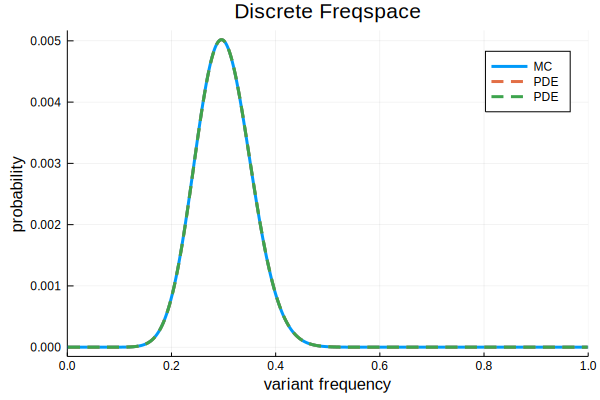

0.9999999999999996
1.0000000000003841
0.9999999999997635


In [120]:
# plotting
k = 1/params["N"]/cfs.df
h = plot(dfs.freqs_f[2:end], dfs.n_f[2:end], label="MC", linewidth=3)
plot!(cfs1.freqs_f[2:end-1], cfs1.n_f[2:end-1]*k*cfs.df, linestyle=:dash, label="PDE", linewidth=3)
plot!(cfs2.freqs_f[2:end-1], cfs2.n_f[2:end-1]*k*cfs.df, linestyle=:dash, label="PDE", linewidth=3)
# plot!(cfs1.freqs_f, probCloneKimura_f*k*cfs1.df, linestyle=:dashdot, label= "Kimura solution", linewidth=3)
xlims!((0, 1))
xlabel!("variant frequency")
ylabel!("probability")
title!("Discrete Freqspace")
display(h)

println(sum(dfs.n_f[2:end-1]))
println(sum(cfs.n_f[2:end-1]*cfs.df))
println(sum(probCloneKimura_f[2:end-1]*cfs.df))

## VAF evolution

In [28]:
evolveTime = 59

params = Dict(
    "ρ"=>1.,
    "μ"=>1.2,
    "N"=>500,
    "ϕ"=>0
)

# discrete evolve
dfs = VAFDyn.DFreqspace(params["N"])
println("running Markov Chain")
VAFDyn.evolveVAF(dfs, params, evolveTime, 0.001)

sampledfs = VAFDyn.sampler(dfs, 80)[1]

# # diffusion evolve 
# cfs = VAFDyn.CFreqspace(2001)
# println("running PDE")
# VAFDyn.evolveVAF(cfs, params, evolveTime, 0.0001)

running Markov Chain


Main.VAFDyn.DFreqspace(80, [0.0, 0.0125, 0.025, 0.0375, 0.05, 0.0625, 0.075, 0.0875, 0.1, 0.1125  …  0.8875, 0.9, 0.9125, 0.925, 0.9375, 0.95, 0.9625, 0.975, 0.9875, 1.0], [5895.497994821104, 296.61754919035764, 166.69990048271652, 110.67841397312434, 79.3584139391559, 59.54496039349647, 46.04286140108678, 36.37097058171959, 29.190769818708986, 23.71590386019686  …  0.00014912782903339818, 0.00010491261805982978, 7.220566562417793e-5, 4.839830566244305e-5, 3.139564898300609e-5, 1.9528239707239996e-5, 1.1477155043154343e-5, 6.210694524994525e-6, 2.931044604176146e-6, 0.0])

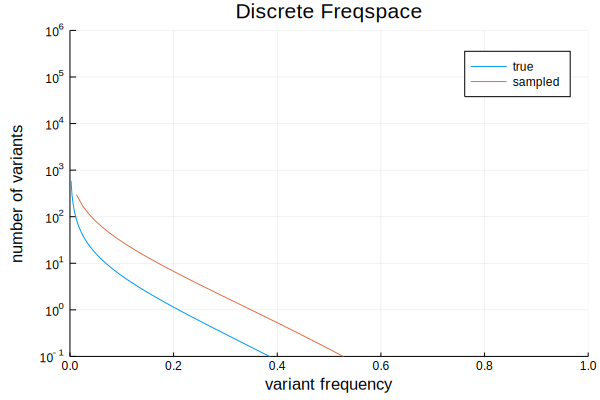

In [29]:
# plotting
h = plot(dfs.freqs_f[2:end-1], dfs.n_f[2:end-1], dpi=100, label="true", yaxis=:log10)
# plot!(cfs.freqs_f[2:end-1], cfs.n_f[2:end-1]/params.N, linestyle=:dash, label="PDE")
# plot!(cfs.freqs_f[2:end-1], map(x -> params.μ/x, cfs.freqs_f[2:end-1]), linestyle=:dot, label="μ/f")
xlims!((0, 1))
ylims!((10^-1, 10^6))
xlabel!("variant frequency")
ylabel!("number of variants")
title!("Discrete Freqspace")

sampledfs = VAFDyn.sampler(dfs, 80)[1]

plot!(h, sampledfs.freqs_f[2:end-1], sampledfs.n_f[2:end-1], label="sampled", yaxis=:log10)
display(h)